## Modelo de Monte Carlo para la valuación de opciones europeas

#### _European Option Pricing with Montecarlo_



#### Ventajas y limitaciones del enfoque de Monte Carlo

#### Ventajas:

- Flexibilidad: el modelo de Monte Carlo es aplicable a una amplia variedad de opciones y activos subyacentes, incluyendo opciones personalizadas que sean más difíciles de adaptar desde Black-Scholes.


#### Limitaciones:

- Tiempo de cálculo: a medida que aumenta el número de simulaciones, el tiempo de cálculo también aumenta.
- Precisión: el valor estimado de la opción puede tener cierta variabilidad debido al carácter aleatorio de las simulaciones.

### Matemáticas necesarias

Puedes valuar una opción sin utilizar el modelo de Black-Scholes y en su lugar para simular el precio del activo subyacente en diferentes momentos, utilizar la ecuación de Movimiento Geométrico Browniano [_(Geometric Brownian Motion)_](https://en.wikipedia.org/wiki/Geometric_Brownian_motion), que se define como:

$$
S_t = S_0 \cdot e^{(r - \frac{\sigma^2}{2})t + \sigma\sqrt{t}Z}
$$


Donde:

$S_t$: Precio del activo subyacente en el tiempo $t$

$S_0$: Precio inicial del activo subyacente

$r$: Tasa de interés libre de riesgo

$\sigma$: Volatilidad del activo subyacente

$t$: Tiempo

$Z$: Variable aleatoria normal estándar (con media 0 y desviación estándar 1)

A continuación, calculamos el valor esperado del pago (valor intrínseco) de la opción en cada trayectoria simulada y descontamos el valor a la fecha presente utilizando la tasa de interés libre de riesgo.

Para una opción europea call, el valor intrínseco es:

$ C_T = max(S_T − K,0) $

Para una opción europea put, el valor intrínseco es:

$ P_T = max(K - S_T,0) $

Donde $K$ es el precio strike de la opción.

El valor esperado de la opción se calcula como la media de los pagos descontados de todas las trayectorias simuladas y se expresa como:

$$
C_0 = e^{-rT} \cdot \frac{1}{N} \sum_{i=1}^{N} C_{T,i}
$$


$$
P_0 = e^{-rT} \cdot \frac{1}{N} \sum_{i=1}^{N} P_{T,i}
$$


**Donde:**

**$C_0$ y $P_0$:** Valor presente de la opción de compra y de venta, respectivamente.

**$T$:** Tiempo hasta el vencimiento de la opción.

**$N$:** Número de trayectorias simuladas.

**$C_{T,i}$ y $P_{T,i}$:** Pago de la opción de compra y de venta en la trayectoria $i$, respectivamente.

$r$: tasa libre de riesgo

##### Pequeña explicación
Estas fórmulas representan el precio actual (también conocido como valor presente) de una cartera de opciones de compra (C) y de venta (P), respectivamente. La estructura de ambas fórmulas es muy similar, y ambas tienen en cuenta el valor presente de los flujos de efectivo futuros.


Para entender mejor cada elemento de las ecuaciones, vamos a desglosarlas:

$C_0$ y $P_0$: estos son los precios actuales de las carteras de opciones de compra y de venta, respectivamente. Se calculan a partir del valor presente de los flujos de efectivo futuros.

$e^{-rT}$: esta es la tasa de descuento, necesaria para convertir a valor presente el valor de las opciones al vencimiento. r es la tasa de interés libre de riesgo, y T es el tiempo en años que falta para el vencimiento de las opciones.

$\frac{1}{N} \sum_{i=1}^{N} C_{T,i}$ y $\frac{1}{N} \sum_{i=1}^{N} P_{T,i}$: estas son las medias aritméticas de los precios de las opciones de compra y de venta que forman la cartera. Cada $C_{T,i}$ y $P_{T,i}$ representa el precio de una opción individual en el momento T.


Ahora, implementemos esto en Python y usemos gráficas para visualizar los resultados.

**Importación de las bibliotecas necesarias**

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

**Importación de los datos necesarios**

In [4]:
ticker = 'SPY'  # Ticker de ETF SP500
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

Date
2022-01-03    463.046051
2022-01-04    462.890900
2022-01-05    454.002411
2022-01-06    453.575897
2022-01-07    451.782684
                 ...    
2023-12-22    473.649994
2023-12-26    475.649994
2023-12-27    476.510010
2023-12-28    476.690002
2023-12-29    475.309998
Name: Adj Close, Length: 501, dtype: float64

**Cálculo del rendimiento diario y la volatilidad anualizada del activo subyacente**

Estas líneas de código se utilizan para calcular la volatilidad anualizada de un activo subyacente, que es un componente clave en la valuación de opciones. Es importante tener en cuenta que el cálculo de la volatilidad implica el uso de logaritmos, que son válidos en el contexto de las finanzas.

El cálculo del rendimiento diario del activo subyacente se realiza a partir de la serie de precios diarios del activo. La función "np.log" se utiliza para calcular el logaritmo natural del cociente de los precios del activo en dos días consecutivos. Al tomar el logaritmo de este cociente, estamos calculando la variación porcentual entre los dos precios y no simplemente la diferencia de precios. Luego, se elimina cualquier valor NaN (not a number) con la función "dropna()" para asegurarnos de que los cálculos posteriores sean precisos.

Una vez que se han calculado los rendimientos diarios del activo subyacente, se utiliza la desviación estándar anualizada de estos rendimientos para calcular la volatilidad anualizada del activo subyacente. La volatilidad anualizada se calcula multiplicando la desviación estándar de los rendimientos diarios por la raíz cuadrada de 252 (que es el número de días de negociación en un año típico). El resultado es la volatilidad anualizada del activo subyacente.

El uso de logaritmos es válido en finanzas porque es común asumir que el rendimiento de los activos financieros tiende a seguir una distribución lognormal. Esto significa que los rendimientos tienden a estar más cerca de la media y tienen una cola más larga hacia los valores extremos. El uso de logaritmos ayuda a manejar los valores extremos de los rendimientos y hacer que los cálculos sean más precisos. Además, el uso de logaritmos permite sumar los rendimientos en lugar de multiplicarlos, lo que hace que los cálculos sean más fáciles.

In [6]:
daily_returns = np.log(data / data.shift(1)).dropna()  # Cálculo del rendimiento diario del activo subyacente
sigma = daily_returns.std() * np.sqrt(252)  # Cálculo de la volatilidad anualizada del activo subyacente

In [7]:
daily_returns

Date
2022-01-04   -0.000335
2022-01-05   -0.019389
2022-01-06   -0.000940
2022-01-07   -0.003961
2022-01-10   -0.001245
                ...   
2023-12-22    0.002008
2023-12-26    0.004214
2023-12-27    0.001806
2023-12-28    0.000378
2023-12-29   -0.002899
Name: Adj Close, Length: 500, dtype: float64

**Definición de los parámetros para la simulación de Monte Carlo**

In [8]:
S0 = data[-1]     # Precio inicial del activo subyacente (último precio disponible)
K = 420           # Precio strike de las opciones
T = 151/365       # Tiempo hasta el vencimiento de las opciones (en años)
r = 0.05          # Tasa de interés libre de riesgo
num_simulations = 10000  # Número de trayectorias simuladas para la valuaciónb

In [9]:
S0

475.30999755859375

**Simulación de Monte Carlo para generar una serie de precios posibles para el activo subyacente en la fecha de vencimiento de las opciones**

Las siguientes dos líneas de código se utilizan para generar trayectorias simuladas del precio del activo subyacente.

La primera línea de código genera un conjunto de números aleatorios normalmente distribuidos utilizando la función "np.random.normal". Estos números se utilizan para simular la variación aleatoria en el precio del activo subyacente. La función "np.random.normal" toma tres argumentos: la media (que es cero en este caso), la desviación estándar (que es uno en este caso) y el número de simulaciones que se desean generar (que es el valor de "num_simulations").

La segunda línea de código utiliza los números aleatorios generados anteriormente para simular los precios del activo subyacente en diferentes momentos en el futuro. La fórmula utilizada se basa en el modelo de movimiento geométrico Browniano.La fórmula tiene en cuenta el precio actual del activo subyacente (S0), la volatilidad anualizada del activo subyacente (sigma), el tiempo hasta el vencimiento de las opciones (T), la tasa de interés libre de riesgo (r) y los números aleatorios generados anteriormente (Z).

In [10]:
Z = np.random.normal(0, 1, num_simulations)  # Generación de números aleatorios para la simulación de Monte Carlo
St = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Cálculo de los precios simulados para el activo subyacente

In [11]:
Z

array([ 3.28232384,  0.58264504, -1.74506011, ..., -1.25765208,
       -0.36410304,  1.45513632])

In [12]:
Z.shape

(10000,)

In [13]:
St

array([727.2309978 , 518.00065717, 386.62477466, ..., 411.04678424,
       459.89537733, 578.02792104])

In [14]:
St.shape

(10000,)

In [15]:
np.mean(St)

485.01444019590076

In [16]:
np.median(St)

480.61200364914447

**Cálculo del pago de las opciones para cada una de las trayectorias simuladas**

Estas líneas de código se utilizan para calcular el pago de una opción de compra (call) y una opción de venta (put) respectivamente, a partir de los precios simulados del activo subyacente.

La primera línea de código utiliza la función "np.maximum" para calcular el pago de la opción de compra. La función "np.maximum" toma dos argumentos: los precios simulados del activo subyacente (St) y el precio de ejercicio de la opción de compra (K). La función devuelve el valor máximo entre la diferencia entre los precios simulados del activo subyacente y el precio de ejercicio (St - K) y cero. Esto asegura que el pago de la opción de compra siempre sea cero si el precio del activo subyacente en el futuro es menor que el precio de ejercicio, y de lo contrario, sea igual a la diferencia entre el precio simulado del activo subyacente y el precio de ejercicio.

La segunda línea de código utiliza la misma función "np.maximum" para calcular el pago de la opción de venta. En este caso, la función devuelve el valor máximo entre la diferencia entre el precio de ejercicio y los precios simulados del activo subyacente (K - St) y cero. Esto asegura que el pago de la opción de venta siempre sea cero si el precio del activo subyacente en el futuro es mayor que el precio de ejercicio, y de lo contrario, sea igual a la diferencia entre el precio de ejercicio y el precio simulado del activo subyacente.

In [17]:
call_payoff = np.maximum(St - K, 0)  # Pago de la opción de compra (call)
put_payoff = np.maximum(K - St, 0)  # Pago de la opción de venta (put)m

In [18]:
call_payoff

array([307.2309978 ,  98.00065717,   0.        , ...,   0.        ,
        39.89537733, 158.02792104])

In [19]:
put_payoff

array([ 0.        ,  0.        , 33.37522534, ...,  8.95321576,
        0.        ,  0.        ])

**Cálculo del valor presente de las opciones mediante la obtención del promedio de los pagos de las opciones y su descontado a su valor presente**

Estas líneas de código se utilizan para calcular el valor presente de una opción de compra (call) y una opción de venta (put), respectivamente, a partir de los pagos de opciones calculados previamente y teniendo en cuenta la tasa de interés libre de riesgo.

La primera línea de código utiliza la fórmula de valor presente para calcular el valor presente de la opción de compra. La fórmula tiene en cuenta el pago de la opción de compra calculado previamente (call_payoff), la tasa de interés libre de riesgo (r) y el tiempo hasta el vencimiento de la opción (T). La función "np.mean" se utiliza para calcular la media aritmética de los pagos de opciones. Luego, se multiplica el valor promedio de los pagos de opciones por el factor de descuento del valor presente (np.exp(-r * T)) para obtener el valor presente de la opción de compra.

La segunda línea de código utiliza la misma fórmula de valor presente para calcular el valor presente de la opción de venta. En este caso, se utiliza el pago de la opción de venta calculado previamente (put_payoff) en lugar del pago de la opción de compra. Se utiliza la misma función "np.mean" para calcular la media aritmética de los pagos de opciones, y luego se multiplica por el factor de descuento del valor presente (np.exp(-r * T)) para obtener el valor presente de la opción de venta.

In [20]:
call_value = np.exp(-r * T) * np.mean(call_payoff)  # Valor presente de la opción de compra (call)
put_value = np.exp(-r * T) * np.mean(put_payoff)  # Valor presente de la opción de venta (put)

**Impresión de los resultados de la valuación de las opciones**

In [21]:
print(f"Valor de la opción call: {call_value:.4f}")
print(f"Valor de la opción put: {put_value:.2f}")

Valor de la opción call: 67.0981
Valor de la opción put: 3.41


Cambiar los valores de K hasta 600

In [25]:
def sim_variando_K(K):
    S0 = data[-1]     # Precio inicial del activo subyacente (último precio disponible)
    T = 151/365       # Tiempo hasta el vencimiento de las opciones (en años)
    r = 0.05          # Tasa de interés libre de riesgo
    num_simulations = 10000  # Número de trayectorias simuladas para la valuación

    Z = np.random.normal(0, 1, num_simulations)  # Generación de números aleatorios para la simulación de Monte Carlo
    St = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Cálculo de los precios simulados para el activo subyacente

    call_payoff = np.maximum(St - K, 0)  # Pago de la opción de compra (call)
    put_payoff = np.maximum(K - St, 0)  # Pago de la opción de venta (put)m
    
    return np.mean(call_payoff), np.mean(put_payoff)

In [26]:
k_values = np.linspace(S0*0.8,S0*1.2,100)
lista_put = []
lista_call = []
lista_precios = []

for k in k_values:
    valor_call, valor_put = sim_variando_K(k)
    
    lista_precios.append(k)
    lista_call.append(valor_call)
    lista_put.append(valor_put)

precios = np.array(lista_precios)    
call = np.array(lista_call)
put = np.array(lista_put)

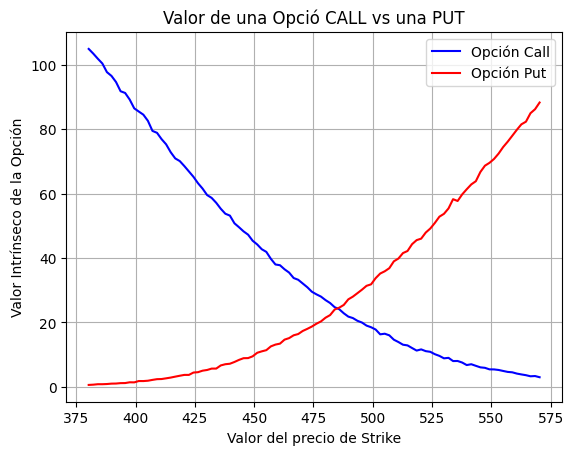

In [27]:
plt.plot(precios, call, c = "b", label="Opción Call")
plt.plot(precios, put, c = "r", label="Opción Put")
plt.xlabel("Valor del precio de Strike")
plt.ylabel("Valor Intrínseco de la Opción")
plt.legend(loc="best")
plt.title("Valor de una Opció CALL vs una PUT")
plt.grid()